<h1 style="color:#16a113"> Pakistan Super League 2016-2025 Data Analysis </h1>

<h2 style="color:#92dde8"> Imports </h2>

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utilities import read_kaggle_dataset


<h2 style="color:#92dde8"> Access Dataset </h2>


In [72]:
df = read_kaggle_dataset(url="hadikhan4234/psl-pakistan-super-league-general-dataset", filename="Match.xlsx")

✅ Moved '/Users/fuzi_x_muzi/.cache/kagglehub/datasets/hadikhan4234/psl-pakistan-super-league-general-dataset/versions/1/PSL DATA/Match.xlsx' → '/Users/fuzi_x_muzi/Documents/Symtera Tech/PSL-Complete-Data-Analysis/data/Match.xlsx'
Downloaded and read /Users/fuzi_x_muzi/Documents/Symtera Tech/PSL-Complete-Data-Analysis/data/Match.xlsx


<h2 style="color:#92dde8"> Cleaning </h2>


In [105]:
# Standardize column names, remove unfinished matches, change dates to datetime objects, update missing city value
df.columns = df.columns.map(str.lower)
df = df[df['winner'] != 'No result']
df["date"] = pd.to_datetime(df["date"], errors='coerce')
df.loc[df['city'].isnull(), 'city'] = 'Rawalpindi'

# Create a custom, consistent color palette to use across visualizations
teams = set(df['team 1'].unique()) | set(df['team 2'].unique())
colors = sns.color_palette("dark", n_colors=len(teams))
custom_palette = {team: color for team, color, in zip(teams, colors)}

<h2 style="color:#16a113"> Task 1: King's Toss </h2>

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 279 entries, 0 to 285
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   scorecard         279 non-null    object        
 1   team 1            279 non-null    object        
 2   team 2            279 non-null    object        
 3   winner            279 non-null    object        
 4   man_of_the_match  279 non-null    object        
 5   season            279 non-null    object        
 6   date              279 non-null    datetime64[ns]
 7   city              279 non-null    object        
 8   venue             279 non-null    object        
 9   toss_winner       279 non-null    object        
 10  toss_descision    279 non-null    object        
dtypes: datetime64[ns](1), object(10)
memory usage: 26.2+ KB


In [107]:
df.head()

,scorecard,team 1,team 2,winner,man_of_the_match,season,date,city,venue,toss_winner,toss_descision
0,Match 1,Islamabad United,Quetta Gladiators,Quetta Gladiators,Mohammad Nawaz \n,PSL-2016,2016-02-04,Dubai,Dubai International Cricket Stadium,Quetta Gladiators,field
1,Match 2,Lahore Qalandars,Karachi Kings,Karachi Kings,Shakib Al Hasan \n,PSL-2016,2016-02-05,Dubai,Dubai International Cricket Stadium,Karachi Kings,field
2,Match 3,Islamabad United,Peshawar Zalmi,Peshawar Zalmi,Mohammad Asghar \n,PSL-2016,2016-02-05,Dubai,Dubai International Cricket Stadium,Peshawar Zalmi,bat
3,Match 4,Karachi Kings,Quetta Gladiators,Quetta Gladiators,Ahmed Shehzad \n,PSL-2016,2016-02-06,Dubai,Dubai International Cricket Stadium,Quetta Gladiators,field
4,Match 5,Lahore Qalandars,Peshawar Zalmi,Peshawar Zalmi,Tamim Iqbal \n,PSL-2016,2016-02-06,Dubai,Dubai International Cricket Stadium,Peshawar Zalmi,field


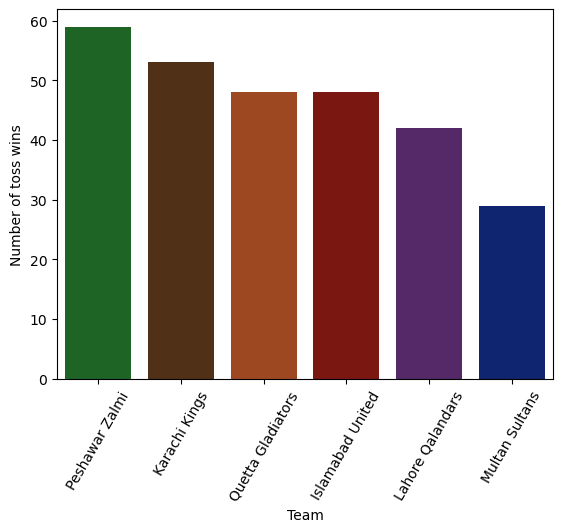

The team with the greatest number of tosses won is Peshawar Zalmi with 59 wins.


In [108]:
sns.countplot(x="toss_winner", hue='toss_winner', palette=custom_palette, data=df, order=df['toss_winner'].value_counts().index)
plt.ylabel("Number of toss wins")
plt.xlabel("Team")
plt.xticks(rotation=60)
plt.show()
print(f"The team with the greatest number of tosses won is {df['toss_winner'].value_counts().idxmax()} with {df['toss_winner'].value_counts().max()} wins.")

<h2 style="color:#16a113"> Task 2: Fortress Gaddafi </h2>


In [109]:
df[df['city'].isnull()]

,scorecard,team 1,team 2,winner,man_of_the_match,season,date,city,venue,toss_winner,toss_descision


In [110]:
df[df['venue'] == "Rawalpindi Cricket Stadium"]

,scorecard,team 1,team 2,winner,man_of_the_match,season,date,city,venue,toss_winner,toss_descision
124,Match 9,Islamabad United,Quetta Gladiators,Quetta Gladiators,Ben Cutting \n,PSL-2020,2020-02-27,Rawalpindi,Rawalpindi Cricket Stadium,Quetta Gladiators,field
126,Match 11,Lahore Qalandars,Peshawar Zalmi,Peshawar Zalmi,Lewis Gregory \n,PSL-2020,2020-02-28,Rawalpindi,Rawalpindi Cricket Stadium,Lahore Qalandars,field
129,Match 14,Islamabad United,Karachi Kings,Karachi Kings,Alex Hales \n,PSL-2020,2020-03-01,Rawalpindi,Rawalpindi Cricket Stadium,Karachi Kings,field
130,Match 15,Peshawar Zalmi,Karachi Kings,Karachi Kings,Mohammad Amir \n,PSL-2020,2020-03-02,Rawalpindi,Rawalpindi Cricket Stadium,Karachi Kings,field
133,Match 18,Quetta Gladiators,Peshawar Zalmi,Peshawar Zalmi,Shoaib Malik \n,PSL-2020,2020-03-05,Rawalpindi,Rawalpindi Cricket Stadium,Quetta Gladiators,bat
135,Match 20,Peshawar Zalmi,Islamabad United,Islamabad United,Shadab Khan \n,PSL-2020,2020-03-07,Rawalpindi,Rawalpindi Cricket Stadium,Peshawar Zalmi,field
137,Match 22,Islamabad United,Multan Sultans,Multan Sultans,James Vince \n,PSL-2020,2020-03-08,Rawalpindi,Rawalpindi Cricket Stadium,Multan Sultans,field
233,Match 16,Islamabad United,Lahore Qalandars,Lahore Qalandars,David Wiese \n,PSL-2023,2023-02-27,Rawalpindi,Rawalpindi Cricket Stadium,Lahore Qalandars,bat
235,Match 18,Quetta Gladiators,Lahore Qalandars,Lahore Qalandars,Sikandar Raza \n,PSL-2023,2023-03-02,Rawalpindi,Rawalpindi Cricket Stadium,Quetta Gladiators,field
237,Match 20,Multan Sultans,Lahore Qalandars,Lahore Qalandars,Rashid Khan \n,PSL-2023,2023-03-04,Rawalpindi,Rawalpindi Cricket Stadium,Lahore Qalandars,bat


#### Removed Code/Data

In [34]:
# df = read_kaggle_dataset("zeeshanahmad124586/psl-complete-dataset-2016-2025")
# df.info()
# df.head(10)
# print(f"Total matches: {df["match_id"].nunique()}")
# df["date"] = pd.to_datetime(df["date"], errors='coerce')
# df = df[df['date'].dt.year != 2025]
# print(f"Total matches: {df["match_id"].nunique()}")
# print(df["venue"].unique())
# df.replace(inplace=True, to_replace={
#     "National Stadium, Karachi": "National Stadium",
#     "Sheikh Zayed Stadium, Abu Dhabi": "Sheikh Zayed Stadium",
#     "Gaddafi Stadium, Lahore": "Gaddafi Stadium"
# })
# print(df["venue"].unique())
# df = df.merge(df_toss['date'], on="venue", how="left")
